In [8]:
from main import *
import pandas as pd

Below an example of how a classical predator-prey simulation would look like with positive parameters.

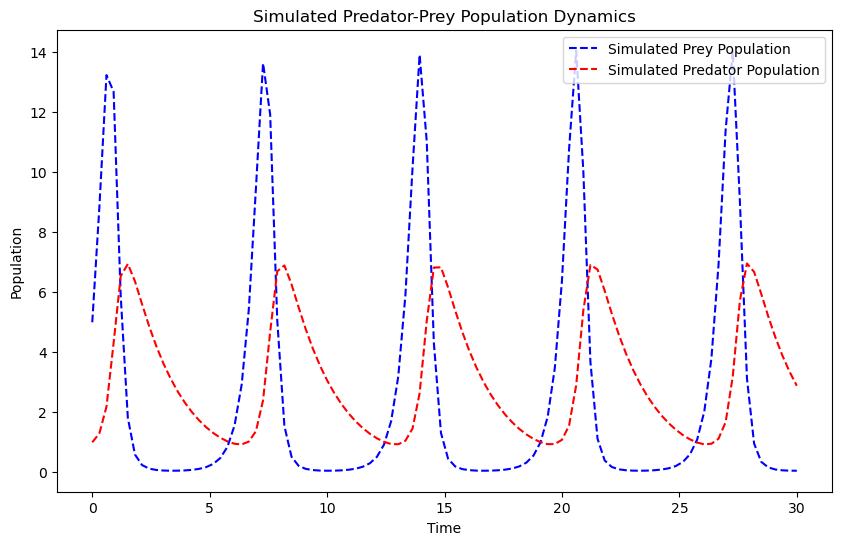

In [9]:
alpha = 3
beta = 1
delta = .2
gamma = .5
params = (alpha,
          beta,
          delta,
          gamma)
y_0 = np.array([5,1]) # initial population
t = np.linspace(0,30,100)
simulated = odeint(lv_system, y_0, t, args=params)
x = simulated[:,0]
y = simulated[:,1]

plt.figure(figsize=(10, 6))
plt.plot(t, x, 'b--',label='Simulated Prey Population')
plt.plot(t, y, 'r--',label='Simulated Predator Population')
plt.xlabel('Time')
plt.ylabel('Population')
plt.title('Simulated Predator-Prey Population Dynamics')
plt.legend(loc='upper right')
plt.show()
T = 2*np.pi/np.sqrt(alpha*gamma)

Display the loaded data to know what it looks like and plot it

In [10]:
data

,t,x,y
0,0.000000,4.781635,3.035257
1,0.202020,6.114005,2.189746
2,0.404040,6.238361,1.478907
3,0.606061,5.520524,0.989836
4,0.808081,4.582546,0.957827
...,...,...,...
95,19.191919,0.310346,1.241890
96,19.393939,0.324595,1.437257
97,19.595960,0.258083,1.562810
98,19.797980,0.283680,1.834171


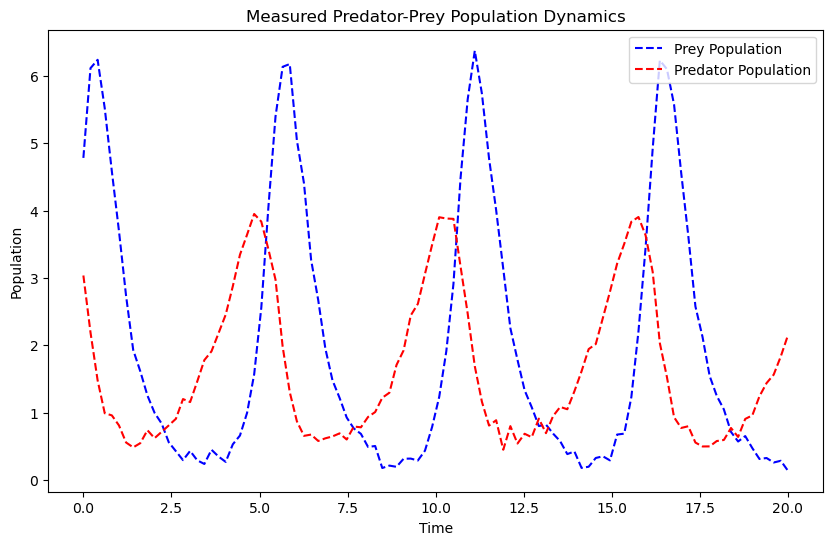

In [11]:
plt.figure(figsize=(10, 6))
plt.plot(data['t'],data['x'],'b--',label='Prey Population')
plt.plot(data['t'],data['y'],'r--',label='Predator Population')
plt.xlabel('Time')
plt.ylabel('Population')
plt.title('Measured Predator-Prey Population Dynamics')
plt.legend(loc='upper right')
plt.show()

Starting Parameters: [-1.         -0.58946135 -0.39533502 -1.46000065]


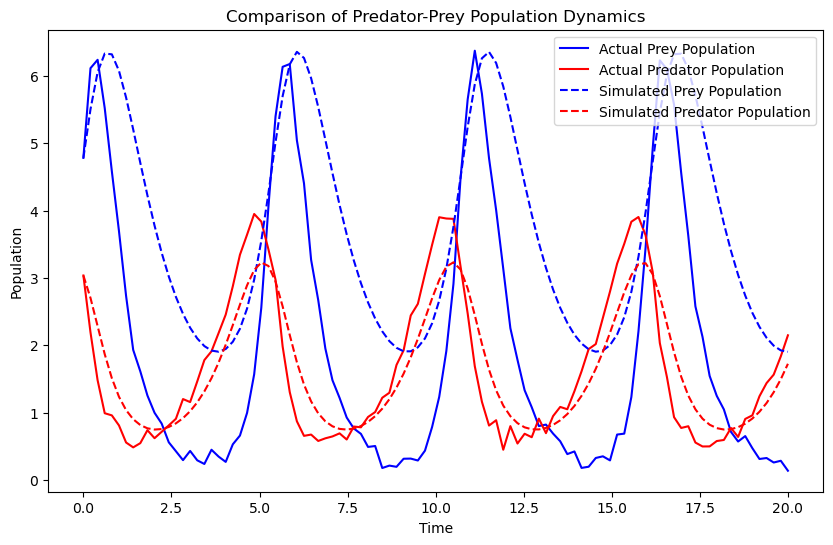

In [12]:
# initial guesses and approximations
T = 5.2 
alpha = -1
beta = alpha/data['y'][0]-0.26 
gamma = 1/alpha * (2*np.pi/T)**2
delta = gamma/data['x'][0]-0.09
starting = np.array([alpha,beta,delta,gamma])
print("Starting Parameters:", starting)
plot_sim( np.array([alpha,beta,delta,gamma]),data)

In [13]:
starting = np.array([alpha,beta,delta,gamma]) # initial guesses
starting = np.array([-2.02748912, -1.13671319, -0.44162828, -0.84144125]) # initial guess from previous fitting runs
print("Starting Parameters:", starting)
temp = 8

for i in range(4):
    
    optimized_params =optimize_parameters(data,method = 'simulated_annealing', func='mae', i=5000, temp = temp, array= starting)
    print("Optimized Parameters:", optimized_params)
    sse_error, mae_error = calculate_errors(optimized_params, data)
    print("Error (SSE) between simulated and original data:", sse_error)
    print("Error (MAE) between simulated and original data:", mae_error)
    starting = optimized_params
    #plot_sim(optimized_params, data)
    if i>0:
        if previous_error<=mae_error:
            temp*=2
            print('temperature increased')
        else:
            temp/=2
            print('temperature decreased')
    previous_error = mae_error


Starting Parameters: [-2.02748912 -1.13671319 -0.44162828 -0.84144125]


c:\Users\bruno\anaconda3\Lib\site-packages\scipy\integrate\_odepack_py.py:248: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)
c:\Users\bruno\Documents\GitHub\stochastic_sim_assignment_3\main.py:99: RuntimeWarning: overflow encountered in scalar divide
  if option_score < current_score or np.exp((current_score - option_score)/temp) > np.random.rand():
c:\Users\bruno\Documents\GitHub\stochastic_sim_assignment_3\main.py:99: RuntimeWarning: divide by zero encountered in scalar divide
  if option_score < current_score or np.exp((current_score - option_score)/temp) > np.random.rand():


Optimized Parameters: [-2.02748912 -1.13671319 -0.44162828 -0.84144125]
Error (SSE) between simulated and original data: 2.994004075138656
Error (MAE) between simulated and original data: 0.1897823707369809
Optimized Parameters: [-1.87266984 -1.07174402 -0.4741833  -0.91392728]
Error (SSE) between simulated and original data: 3.0580062879869288
Error (MAE) between simulated and original data: 0.1788627532622951
temperature decreased
Optimized Parameters: [-1.87266984 -1.07174402 -0.4741833  -0.91392728]
Error (SSE) between simulated and original data: 3.0580062879869288
Error (MAE) between simulated and original data: 0.1788627532622951
temperature increased
Optimized Parameters: [-1.87266984 -1.07174402 -0.4741833  -0.91392728]
Error (SSE) between simulated and original data: 3.0580062879869288
Error (MAE) between simulated and original data: 0.1788627532622951
temperature increased


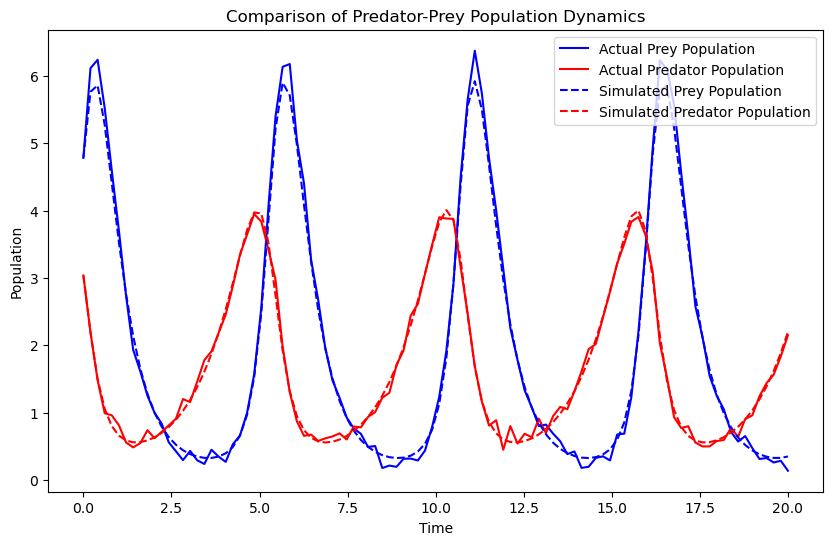

In [14]:
plot_sim(optimized_params, data)


[-1.87266984 -1.07174402 -0.4741833  -0.91392728]


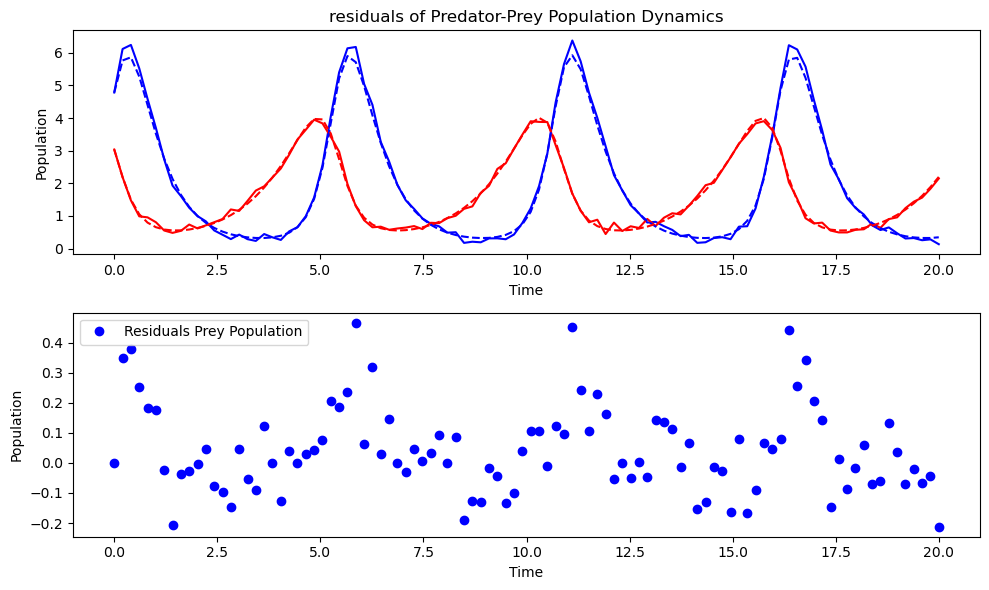

(3.0580062879869288, 0.1788627532622951)


(array([ 5.,  8., 22., 18., 18.,  8.,  9.,  5.,  4.,  3.]),
 array([-0.15945975, -0.11990727, -0.08035479, -0.04080231, -0.00124982,
         0.03830266,  0.07785514,  0.11740763,  0.15696011,  0.19651259,
         0.23606507]),
 <BarContainer object of 10 artists>)

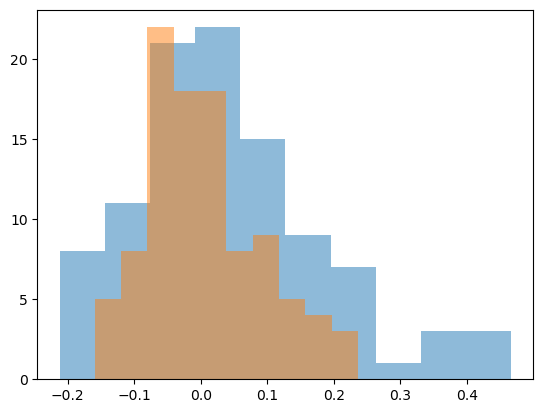

In [15]:
simulated = sim_lv(optimized_params, data['t'])
print(optimized_params)
fig = plt.figure(figsize=(10, 6))
ax2 = fig.add_subplot(211)
ax2.plot(data['t'], data['x'], 'b-', label='Actual Prey Population')
ax2.plot(data['t'], data['y'], 'r-', label='Actual Predator Population')
ax2.plot(data['t'], simulated[:, 0], 'b--',
            label='Simulated Prey Population')
ax2.plot(data['t'], simulated[:, 1], 'r--',
            label='Simulated Predator Population')
ax2.set_xlabel('Time')
ax2.set_ylabel('Population')
ax2.set_title('Comparison of Predator-Prey Population Dynamics')
ax1 = fig.add_subplot(212)
ax1.plot(data['t'], data['x']-simulated[:, 0], 'bo',
            label='Residuals Prey Population')
# ax1.plot(data['t'], data['y']-simulated[:, 1], 'ro',
#             label='Residuals Predator Population')
ax1.set_xlabel('Time')
ax1.set_ylabel('Population')
ax2.set_title('residuals of Predator-Prey Population Dynamics')
ax1.legend()
plt.tight_layout()
plt.show()
print(calculate_errors(optimized_params, data))
plt.hist(data['x']-simulated[:, 0], bins=10,alpha = 0.5)
plt.hist(data['y']-simulated[:, 1], bins=10,alpha = 0.5)

In [17]:
from scipy import stats

contingency_table = np.array([
    [sum(data['y']), sum(simulated[:, 1])],
    [sum(data['x']), sum(simulated[:, 0])]
])

# Perform chi-square test
chi2_stat, p_value, dof, expected = stats.chi2_contingency(contingency_table)

# Print results
print(f"Chi-square statistic: {chi2_stat}")
print(f"P-value: {p_value}")
print(f"Degrees of freedom: {dof}")
print("Expected frequencies:")
print(expected)

# Make a decision based on the p-value
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis. There is a significant difference.")
else:
    print("Fail to reject the null hypothesis. The model fits well.")

Chi-square statistic: 0.0027638652499421624
P-value: 0.9580725474733193
Degrees of freedom: 1
Expected frequencies:
[[164.89836157 162.73800403]
 [200.11369025 197.49197154]]
Fail to reject the null hypothesis. The model fits well.


Optimized Parameters: [-2.02748912 -1.13671319 -0.44162828 -0.84144125]
Error (SSE) between simulated and original data: 2.9940047922942243
Error (MAE) between simulated and original data: 0.18978238746664786


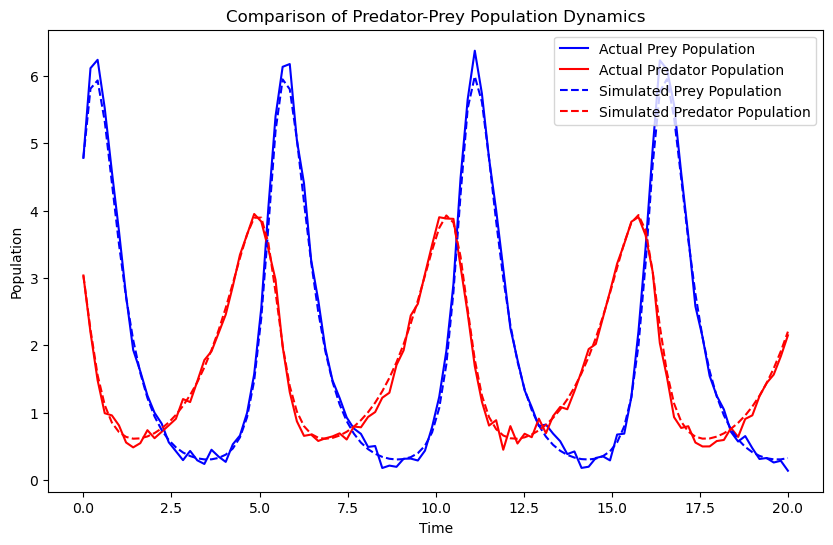

In [ ]:
i=0
starting = np.array([-2, -1.15, -0.4, -0.85]) # based on numerous runs
## choose hill_climbing or simulated_annealing and mae or sse
optimized_params =optimize_parameters(data,'hill_climbing', 'sse', 10000, 1, starting)
print("Optimized Parameters:", optimized_params)
sse_error, mae_error = calculate_errors(optimized_params, data)
print("Error (SSE) between simulated and original data:", sse_error)
print("Error (MAE) between simulated and original data:", mae_error)
starting = optimized_params
i +=1
plot_sim(optimized_params, data)


In [ ]:
def sim_dropped_pts(data,starting,dropped_pts,step=3):
    n_reps = 3
    og_starting = np.array([-2, -1.15, -0.4, -0.85])
    dropped_pts = 4
    fit_failed=False

    simrun_data =[]

    while not fit_failed:
        print(dropped_pts)
        error_n_dropped = (dropped_pts,
                        [],#errors
                        [], #parameters
                        )
        for i in range(n_reps):
            if i == 0:
                sse_min = sse
            
            data_copy = data.drop(data.sample(dropped_pts).index, inplace=False)
            optimized_params = optimize_parameters(data = data_copy ,i=5000,method='simulated_annealing',func = 'sse',temp=4,array=starting)
            sse,mae=calculate_errors(optimized_params,data)
            error_n_dropped[1].append((sse,mae))
            error_n_dropped[2].append(optimized_params)
            print("Error (SSE) between simulated and original data:", sse)
            print("Error (MAE) between simulated and original data:", mae)
            #plot_sim(optimized_params,data)

        simrun_data.append(error_n_dropped)
        if sse>15:
            fit_failed=True
        dropped_pts += step
        

4


Error (SSE) between simulated and original data: 4.55715587081375
Error (MAE) between simulated and original data: 0.22341774303706913
Error (SSE) between simulated and original data: 3.981269479357916
Error (MAE) between simulated and original data: 0.22540130272573639
Error (SSE) between simulated and original data: 3.7718041506717315
Error (MAE) between simulated and original data: 0.20836864748832892
7
Error (SSE) between simulated and original data: 5.476997793108462
Error (MAE) between simulated and original data: 0.23943031203004253
Error (SSE) between simulated and original data: 27.95405111670357
Error (MAE) between simulated and original data: 0.5086555451534885
Error (SSE) between simulated and original data: 5.508775189691392
Error (MAE) between simulated and original data: 0.23641707452126767
10
Error (SSE) between simulated and original data: 41.46865979907444
Error (MAE) between simulated and original data: 0.6462809079378866
Error (SSE) between simulated and original da

In [ ]:
n_dropped_points = []
mean_errors = []
std_errors = []
max_sse = 0
outlier=None
for i,errors,parameters in simrun_data:
    n_dropped_points.append(i)
    sse_list = []
    mae_list = []
    for (sse,mae),param in zip(errors,parameters):
        
        if sse>max_sse:
            max_sse = sse
            outlier = param
        sse_list.append(sse)
        mae_list.append(mae)
    mean_errors.append(np.mean(sse_list))
    std_errors.append(np.std(sse_list)/np.sqrt(len(sse_list)))

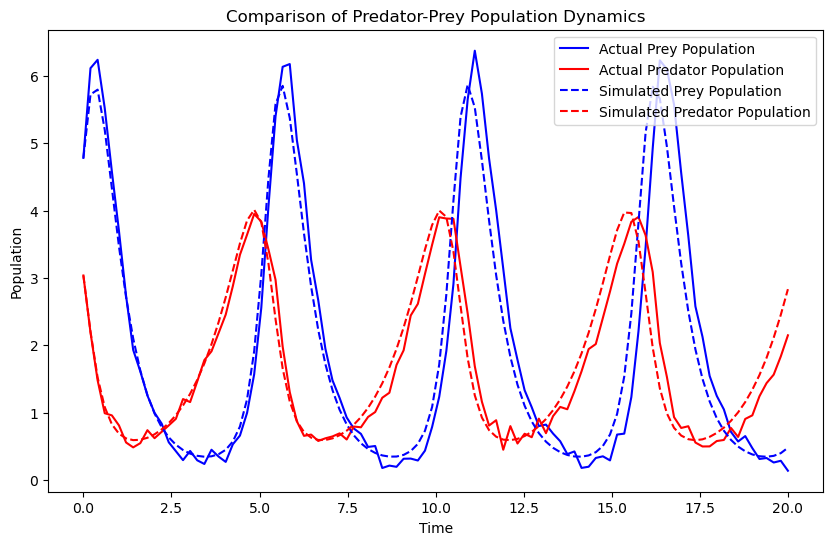

In [ ]:
plot_sim(param,data)

<ErrorbarContainer object of 3 artists>

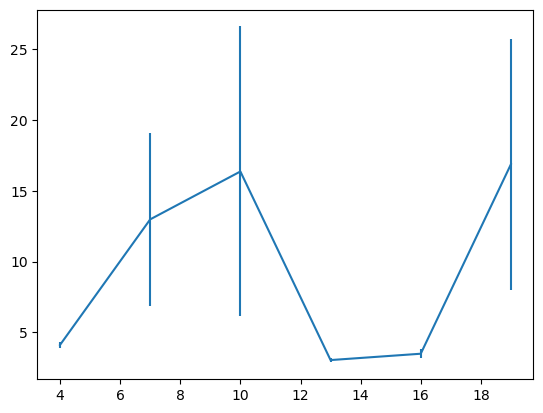

In [ ]:
plt.errorbar(n_dropped_points,mean_errors,y_err=std_errors)